# <span style='color:Blue'> CHECK YOUR BIAS:   </span>
## <span style='color:Blue'> A PYTHON TOOLKIT FOR FAIR LENDING  </span>

#### Summary: This toolkit explores small subset of ideas and techniques of auditing gender bias in credit assessment processes. For a comprehensive discussion of gender bias and fairness in credit assessment, see Women’s World Banking’s “Algorithmic Bias, Financial Inclusion, and Gender,” or our most recent publication, “Check Your Bias! A Field Guide for Lenders,” both available on the Women’s World Banking website. Questions or comments on this toolkit? Email Women’s World Banking at info@womensworldbanking.org.

######  Learning objectives:
###### • Increase awareness about different types of gender bias that may manifest in credit assessment processes
###### • Explore and detect gender biases and their sources in credit assessment processes

***

## <span style='color:Green'> Part I - Introduction (context and concepts)  </span>


##### Project background: 
Women’s World Banking, in partnership with the University of Zurich (UZH) and support from data.org, set out on a two-year technical assistance project with three financial institutions based in India, Mexico, and Colombia. With each institution, we conducted a thorough gender bias audit across either their entire credit portfolio or a particular credit product line/product. 

Our goal in creating this GitHub page is to convey our insights from these three collaborations and share the approach to auditing gender bias. 

##### Who is the audience for this toolkit?
This toolkit is an open-source package associated with the “Check Your Bias! A Field Guide for Lenders” report (available on Women’s World Banking website). It is specifically developed for professionals who are familiar with data science and Python programming and are interested in advocating for fair lending. Examples include data scientists working with financial services providers, coders, risk specialists, and finance professionals who facilitate credit access.

##### Prerequisites for using this toolkit: 
a. Statistical foundations: Familiarity with multiple linear regression, logistic regression, foundations of causal inference, regression discontinuity, and matching techniques.
b. A working knowledge of:
- How to write a function in Python
- How to use Python packages such as numpy, pandas, seaborn, scipy, and statsmodel
- Basic familiarity with Python data structures  

##### What is the core question we are trying to answer in this toolkit?
“Is a particular credit product fair for women applicants?” 

This question is placed at the core of our approach to auditing for gender bias. To have an acceptable and precise response to this question, an institution needs to have a clear understanding of fairness, bias, and how/where a range of biases may arise. We start a quick overview of these concepts. 

##### Defining and measuring fairness
Fairness is an intricate and multidimensional concept. Its definition depends on both context and culture.

Each institution needs to develop/adopt a definition of fairness that everyone within the organization understands and supports. By referring to its own definition of fairness, an institution can benchmark its progress and assess the relative risks of bias. We do not go into the dozens of definitions of fairness here. Instead, we recommend the interested readers to look into the Verma and Rubin (2018) paper on definitions of fairness (https://fairware.cs.umass.edu/papers/Verma.pdf). In broad terms, however, approaches to measuring fairness can be separated into 1) those that promote group-level fairness and 2) those that move towards individual-level fairness.

Group-based fairness measurement rests on the logic of treating different groups equally. They aggregate the measurement values for each pair of groups and compare the unconditional outcomes of a classification algorithm for those groups. The group that an individual belongs to is indicated by its sensitive attribute. In our case, the sample split and comparison is between women and men applicants. Most approaches to evaluating group-based fairness use metrics based on the binary classification confusion matrix to define fairness.

Individual-based fairness measurement rests on the assumption that similar individuals should be treated as similarly as possible. Analyses falling under an individual-based approach try to demonstrate fairness (or the lack thereof) by identifying treatment differences between nearly identical groups of people. In practice, this is commonly done through highly conditional analyses, including those that use quasi-experimental (or even experimental) approaches.

Key takeaway: An institution needs to develop/adopt its own definition of fairness based on its strategic goals and cultural contexts. Ways of measuring fairness—including individual-level and group-level fairness—can fit a range of definitions.

##### What is bias?
In this toolkit, when we talk about bias we are referring to unfair bias or discrimination. Under a discriminatory process, some prioritized groups receive a systematic advantage, and other groups are placed at a systematic disadvantage. Biases can be based on race, color, religion or creed, national origin or ancestry, sex (including gender, pregnancy, sexual orientation, and gender identity), age, physical or mental disability, veteran status, genetic information, citizenship, or other distinguishing factors. Among all these biases, we focus exclusively on gender bias. Throughout this toolkit, bias refers to gender bias, but the toolkit can be adapted to a range of biases including those listed above.  

##### Fairness in lending
We briefly explained what bias and fairness are. Gender-based bias in lending happens when a credit process makes credit decisions that are systemically prejudiced against certain people or groups of different genders. This type of bias stems from a variety of sources. Loan officers can exhibit bias as they assess creditworthiness through interviews and observation. Algorithms assessing applicants' creditworthiness can introduce bias. Other times, data itself can be imbalanced and introduce bias to the algorithm. 

To demonstrate how to assess fairness in credit portfolios, we focus on approved and rejected credit applications and do not include pending, missing, or withdrawal cases in the audit bias practice. Taking this approach, we consider fairness among:
a. Approved applicants: Those applicants who have received credit may receive unfair credit decisions related to credit offers (loan approval), credit scores, loan terms (loan amount, interest rate, and collateral), and loan maturity.
b. Rejected applicants: Those applicants who have not received credit may have been unfairly denied credit due to their gender. 

For those looking for a simple way to start (without having to use more advanced statistical techniques), Women’s World Banking and University of Zurich designed a scorecard for any type of lender to use to assess fairness across six common dimensions. Paying attention to these indicators, particularly over time, will offer institutions the opportunity to identify areas for improvement. Since not all credit processes are the same, the list of fairness-related questions that an institution will ask might vary, and we hope institutions will interpret and adapt these questions to their needs. The six dimensions of fairness in the scorecard are: credit score, approval rate, credit amount, interest rate, collateral amount, and characteristics of rejected candidates. To read the complete descriptions of these dimensions and how to measure them use the following link: https://www.womensworldbanking.org/insights-and-impact/check-your-bias-gender-bias-scorecard-for-lenders/

##### A short introduction to key credit concepts:
- Credit risk: The probability of a loss resulting from a borrower failing to meet contractual credit obligations.
- Credit score: A numerical expression of a credit applicant's perceived risk, predicting the creditworthiness of an individual. Can be based on a credit report coming a credit bureau or can be based on a financial service provider's internal calculations and risk modeling. 
- Loan performance: An indicator of whether a customer is (or group of customers are) making their loan installments on time and in full, or whether a customer is (or group of customers are) in default, measured against the obligations defined in the credit contract. 
- In this toolkit, we use the terms "credit" and "loan" interchangeably. 

***

## <span style='color:Green'> Part II  - Approved applicants</span>
### <span style='color:Green'> Using descriptive and inferential statistics to audit for gender bias in credit processes </span>

### <span style='color:purple'> Step 0. General - Think about these questions before writing your code!:  </span>


* When auditing for gender bias, ask yourself:
    - How does the lender measure risk among different segments of its customers?
    - If this dataset is biased, should I expect to see that bias in the data features or data labels?
    - Do all customers apply through the same channel (app, physical branch, website ...)? If not, do customers coming from different branches experience different approval criteria?
    - How does the FSP measure risk among different segments of its customers?
    - After assessing risk, what are the steps/processes that the lender takes to make credit decisions?
    - How do feedback loops work in your credit processes?    


* When auditing for gender bias, remember and pay close attention to these points:
    - Protected attributes such as gender should not be part of the predictors used by the algorithm or loan officers to make decisions about credits.
    - You cannot assess the fairness of a credit algorithm without knowing the variables used (Corbett-Davies, 2018).
    - Pay close attention to customers who slightly fall above or below the risk thresholds that you have considered for defining the risk categories.

### <span style='color:purple'> Step 1. Descriptive statistics and understanding your data.  </span>

###### Ask yourself - Questions on the time windows that your data covers
* What is the time window that your data covers? 
Warning: If this time window is too short, you need to be careful about statistical inferences that you make based on this data. 
* For each gender, separately, plot a time series that shows how many people have applied for credit in a specific time window. 
Using these time series, you can see if there were specific time windows in which a sharp decrease/increase in lending had have happened. In addition, you can notice the main differences between men and women applications' patterns. 
* Do you see any data anomalies at any specific point in time?
Recommendation: We suggest to take one extra step and study the applications time series for each application channel seperately and study the differences between applications that come from digital channels and physical channels separately.

###### Ask yourself - Questions abour balanced dataset 
* What percentage of applicants are men and what percentage of them are women? If the proportion of women and men applicants is significantly different (unbalanced dataset), that should ring a bell. Algorithms can deal with unbalanced datasets; however, that requires special treatments and deploying the right techniques. 
A field obsevation: Our field experience shows that some FSPs do not pay enough attention/are not well aware about the challenges that an unbalanced dataset can create.  

###### Ask yourself - Questions about loan officers:
* If you have information on the loan officers, check the summary statistics on your loan officers too.
* What percentage of loan officers are men and what percentage are women?
* Do you see strong correlation between gender of a loan officer and the credit approval rate?
 
None of the questions that we raised above would indicate the presence of bias in your dataset. However, each question 
can give you a hint on where bias may exist and how it might have sneaked into your credit process.  

###### Data:
Now we are ready to start our journey of auditing gender bias using statistical methods. We use Python in this toolkit, but the concepts here can be easily translated into other statistical software. 
To better understand how an auditor can use these techniques in practice, we demonstrate how to implement each step using a dummy dataset. You can find this dataset and the code that generates it in the project GitHub page. When designing this dataset, we tried to make it look similar to the datasets that we had received from our lending partners. This dummy data consists of three main components:
1. Input data: A dataset on which a lender bases its credit decisions. This dataset usually contains basic demographic and socio-economic information, institution-level borrowing history, credit bureau data, and alternative data if available.
2. Output data: This dataset shows whether a credit application has been approved. 
* If the application is approved, the output dataset shares information on the credit terms of each approved application. 
* If the application is rejected, the output dataset contains information on why the application was rejected. 
3. Repayment performance data: This dataset shows the loan performance of those customers who have received loans.
 

##### <span style='color:red'> Code 0:  </span>


Import packages

In [9]:
import os 
import emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                               # used for data visualization
import seaborn as sns                                         # used for data visualization
from sklearn.linear_model import LogisticRegression           # used for data audit bias
from scipy.stats import ttest_ind, ttest_ind_from_stats       # used for data audit bias - balance tests
import patsy                                                  # a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices.
import statsmodels.api as sm                                  # used in modeling
import statsmodels.formula.api as smf                         # used in modeling
from IPython.display import HTML                              # used in print statement
from termcolor import colored                                 # used in print statement
from colorama import Fore, Back, Style                        # used in print statement
from termcolor import colored                                 # used in print statement

Set directory and import the data

In [10]:
os.chdir('C:\\Users\mm\Downloads')       # set up the directory
os.getcwd()                              # check your assigned directory to make sure it works properly. 

df_all = pd.read_excel('df_dummy.xlsx')  # import dataset - The code that creates this data as 
                                         # well as the data itself in Excelsheet format is stored 
                                         # on the project GitHub page.

# create seperate datasets for women and men applicants (sex disaggregated data)
# in the next steps, we use these two datasets. 
df_female = df_all.loc[df_all['Gender'] == 'Female']
df_male = df_all.loc[df_all['Gender'] == 'Male']

#####  Data preprocessing
##### Creating risk categories:
What is risk categorization and how can we create risk categories? 
Some FSPs use algorithm/rule based methods to categorize their customers into risk buckets. Categorizing customers into
one of these predefined risk categories helps FSPs to make quicker credit decisions. Although risk categorization can help 
FSPs, it can bring some costs too (we have briefly mentioned some of these costs in the 'CHECK YOUR BIAS! A FIELD GUIDE FOR LENDERS' report). 

One common way of risk categorization is to categorize applicants into low risk, medium risk, and high risk. Applicants categorized as low risk may receive credit approval without the necessity of going through any further investigation.
Medium-risk applicants may receive home visits or video calls to obtain additional information (e.g., on their sources of income, upcoming expenses, etc.). With the risk categorization and these additional pieces of information, a loan officer makes the final credit decision. Applicants with high credit risk are likely to be rejected, with a portion being offered the opportunity to go through an interview process, after which they sometimes receive a loan. These high-risk applicants often need a guarantor or collateral, provided they get loan disbursement approval.
- Creating risk categories:
After explaining what risk categorization is and how an FSP may use it, we need to learn how we can create risk categories.
Among many different approaches that an FSP can take to define risk categories, using credit/model scores is one of the common ones. In this approach, risk managers and risk analysts use their subject matter expertise and experience and define different risk buckets using credit scores. The following piece of code helps you to better understand how you can do this work.    

##### <span style='color:red'> Code 1:  </span>


To conduct risk categorization, we build three functions; 'pre_for_risk_categorization', 'threshold_maker', and 'main_risk_categorization'. The first two, are prerequisites for the last one, which is 'main_risk_categorization'.
* pre_for_risk_categorization: it asks the user to enter its desired number of risk categories.
It evaluates the user input and if it is not a valid input, it returns an error and asks the user to try again. This function does not accept more than four categories. By experience, we learnt that financial institutions do not have more than four risk categories. However, the user can easily modify the code and add more categories; if necessary.
* threshold_maker: It asks the user to enter the thresholds that define each risk category. 
* main_risk_categorization: This function uses the output of the previous two functions and creates a new variable called 'Risk_Category'. 

example) if an auditor declares to the function that he/she/they needs three risk categories and those categories are defined by some thresholds such as 400 and 500, your risk categories would become:
[minimum credit score - 400], [400-500], and [500 - maximum credit score]


In [11]:
def pre_for_risk_categorization():   
    def risk_category():
        global number_categories
        while True:
            number_categories = input('How many risk categories do you have? ')
            try:
                val = int(number_categories)
                if (val > 1 and val <= 4):   # if you need more than 4 risk categories, change 4 to your desired number
                    number_categories = val                      
                    break  

                elif (val <= 0 or val > 7):  # if you need more than 4 risk categories, change 4 to your desired number
                    print('your input cannot be a negative number or a number larger than 4! ')

            except ValueError:
                print("Error. Please enter an integer!")  
##########################################################
    threshold_list = []
    def threshold_maker(): 
        while len(threshold_list) < (number_categories - 1):
            thresholds = input('Insert the credit score thresholds defining the boundaries of each risk category.')    
            try:
                val = int(thresholds)
                if (val > 0):
                    threshold_list.append(val)
                
                elif (val <= 0):  
                    print('your input cannot be a negative number!')
            except ValueError:
                print("Error. Please enter an integer!")  

    risk_category()
    threshold_maker()
    threshold_list = sorted(threshold_list)
    
    return threshold_list

main_risk_categorization function takes two argument:
* argument 1: df is a dataframe object  
* argument 2: var is the name of the variable used for credit score variable

In [12]:
def main_risk_categorization(df, var): 
    
    if number_categories == 2:         # If you need more than 4 categories, add the required number of if statements here in this section
        if (df[var] <= threshold_list[0]):
            val = 1                    
        else:
            val = 2
    if number_categories == 3:
        if (df[var] <= threshold_list[0]):
            val = 1                    
        elif (df[var] > threshold_list[0] and df[var] <= threshold_list[1]):
            val = 2
        else:
            val = 3
    if number_categories == 4:
        if (df[var] <= threshold_list[0]):
            val = 1                    
        elif (df[var] > threshold_list[0] and df[var] <= threshold_list[1]):
            val = 2
        elif (df[var] > threshold_list[1] and df[var] <= threshold_list[2]):
            val = 3
        else:
            val = 4
    return val         

##### <span style = 'color:orange'> Example 1:  </span>

In [13]:
threshold_list = pre_for_risk_categorization()
df_all['Risk_Category'] = df_all.apply(main_risk_categorization, args = ('Credit_Score',), axis = 1) 

How many risk categories do you want to have? 3
Insert the credit score thresholds defining the boundaries of each risk category.400
Insert the credit score thresholds defining the boundaries of each risk category.500


###### Ask yourself - Questions on missing data
* Are there missing values on a specific feature for a large number of applicants?
* Are these missing features affecting the precision of other features in your data set?
* Do you see different patterns of missing values between men and women applicants? 

##### <span style='color:red'> Code 2:  </span>


missing_stat is a function that shows the percentage of missing values in each column broken down by gender. This function takes two arguments. 
* argument 1. a dataframe object containing only women applicants 
* argument 2. a dataframe object containing only men applicants. 

In [ ]:
def missing_stat(df_f, df_m):
    print(colored('Percentage of missing values in each column - broken down by gender:', 'blue', attrs = ['bold']))
    print()
    f_miss = (np.round(df_f.isna().sum()/len(df_f),2)).to_frame(name = '# % of missing - Women applicants')
    m_miss = (np.round(df_m.isna().sum()/len(df_m),2)).to_frame(name = '# % of missing - Men applicants')
    missing_data = pd.concat([f_miss, m_miss], axis = 1)
    print(missing_data)

##### <span style='color:orange'> Example 2:  </span>

In [ ]:
missing_stat(df_female, df_male) 

###### Ask yourself - Questions on feature values and representativeness of your sample
* Do you have access to the whole portfolio dataset or only a sample from the portfolio?
* If you only have access to a sample of a portfolio, is this sample representative of the whole population? 
* Who provided this sample and what was the sampling strategy?   
* Are there unexpected feature values? 
Are there features that contain values that stand out as uncharacteristic or unusual. If that is the case, it can be an indication that some sort of inaccuracies have sneaked into your dataset and it may introduce bias.
* Which applicant segments are being underrepresented? 
* How do the variables, and their values, reflect the real values that you expect from the portfolio?
* Are there signs of data skew? If yes, why do you see such a skewness? 
* Do men and women applicants have systematic differences in their average characteristics (age, income, expenses, occupations, marital status, number of years they have relationship with the FSP ...)?
* Do men and women applicants have systematic differences in their loan terms (interest rate, loan size, the gap between approved credit and requested credit amount, loan maturity, credit scores, collateral type, collateral amount ...)?

##### <span style='color:red'> Code 3:  </span>


descriptive_stat_I_display is a function that provides you with a general idea on how many applicants and how many applications you have in your dataset; while it is broken down by gender.
This function takes 6 arguments.
* df: a dataframe object containing all the records in your portfolio
* df_f: a dataframe object containing records of all the women in your portfolio
* df_m: a dataframe object containing records of all the men in your portfolio
* customer_ID: name of the variable that you use as the unique customer ID
* application_ID: name of the variable that you use as the unique application ID
  It is possible that one customer has a couple of application IDs, because he/she might have received more than one credit/loan.
* balance_ratio: takes a numerical value (float) greater than zero and smaller than one.
  This argument aims to capture how gender balanced your portfolio is. The user sets a value (for example, 0.7) based on his/her opinion. If the portfolio's gender ratio is above this threshold (0.7, for example), the portfolio would be considered highly gender unbalanced.



** 

gender ratio =

max

(

(total number of female observations / total number of male observations)

or

(total number of male observations / total number of female observations)

)

In [27]:
def descriptive_stat_I_display(df, df_f, df_m, customer_ID, application_ID, balance_ratio): 
       
    print('Total number of observations in the portfolio is:', df.shape[0])
    print('Total number of features in the portfolio is:', df.shape[1])
    print('Total number of applicants in the dataset is:', df[str(customer_ID)].nunique())
    print('Total number of applicants in the dataset is:', df[str(customer_ID)].nunique())
    print('Total number of applications in the dataset is:', df[str(application_ID)].nunique())  # An applicant may have couple of applications!
    print('........')
    print('Total number of women applicants in the dataset is:', df_f[str(customer_ID)].nunique())
    print('Total number of men applicants in the dataset is:', df_m[str(customer_ID)].nunique())
    print('........')
    print('Total number applications placed by women applicants is:', df_f[str(application_ID)].nunique())
    print('and')
    print('Total number applications placed by men applicants is:', df_m[str(application_ID)].nunique())

    # The ratio below (Gender_Balance_Ratio) shows the ratio of 'total # of men'/'total # of women' applications. 
    # This ratio can help an auditor to understand how gender balanced the portfolio is. There is no clear cut rule on when
    # we can consider a dataset balanced and when we cannot. If one gender has more than 65 percent presence in the dataset,
    # we consider it as an unbalanced dataset. However, you can come up with your own threshold and use that to assess balance in 
    # your dataset. 
    print('........')
    Gender_Balance_Ratio = df_m[str(application_ID)].nunique()/(df_f[str(application_ID)].nunique() + df_m[str(application_ID)].nunique())
   
    Gender_Balance_Ratio_test = max(Gender_Balance_Ratio, (1 - Gender_Balance_Ratio)) 
    balance_ratio_test = max(balance_ratio, (1 - balance_ratio))
    
    if Gender_Balance_Ratio_test > balance_ratio_test:
        print(emoji.emojize('The portfolio "is" highly gender unbalanced :thumbs_down:'))
    else:
        print(emoji.emojize('The portfolio is "not" gender unbalanced :thumbs_up:'))

##### <span style='color:orange'> Example 3:  </span>

In [28]:
descriptive_stat_I_display(df_all, df_female, df_male, 'Applicant_ID', 'Application_ID', 0.7)

Total number of observations in the portfolio is: 400
Total number of features in the portfolio is: 21
Total number of applicants in the dataset is: 400
Total number of applicants in the dataset is: 400
Total number of applications in the dataset is: 400
........
Total number of women applicants in the dataset is: 140
Total number of men applicants in the dataset is: 260
........
Total number applications placed by women applicants is: 140
and
Total number applications placed by men applicants is: 260
........
The portfolio is "not" gender unbalanced 👍


*** 

##### <span style='color:red'> Code 4:  </span>


descriptive_stat_II_display function lets the auditor compare male and female portfolio variables (only numerical variables).  

descriptive_stat_II_display function takes two arguments.
* argument 1. a dataframe object containing records of all the women in your portfolio 
* argument 2. a dataframe object containing records of all the men in your portfolio 


In [29]:
def descriptive_stat_II_display(df_f, df_m):

    # digging into the summary statistics of all portfolio feature values and comparing men and women characteristics.

    df_sum_stat_f = df_female.describe()
    df_sum_stat_m = df_male.describe()
    df_sum_stat = pd.concat([df_sum_stat_f, df_sum_stat_m], keys = ["Women", "Men"])
    # dropping the unnecessary rows to make the table more readable
    df_sum_stat.drop(index = ('Women', 'count'), inplace = True)
    df_sum_stat.drop(index = ('Women', 'min'), inplace = True)
    df_sum_stat.drop(index = ('Women', 'max'), inplace = True)
    df_sum_stat.drop(index = ('Men', 'count'), inplace = True)
    df_sum_stat.drop(index = ('Men', 'min'), inplace = True)
    df_sum_stat.drop(index = ('Men', 'max'), inplace = True)
    # printing the summary stats table
    return df_sum_stat

##### <span style='color:orange'> Example 4:  </span>

In [30]:
descriptive_stat_II_display(df_female, df_male)

Age  Total_Income  Credit_Score  Loan_Tenure  Interest_Rate  \
Women mean  39.792857   6099.464286    458.614286    18.611940      14.701493   
      std   14.262945   3217.352693    123.739491     6.362664       4.789556   
      25%   27.000000   4164.750000    357.000000    14.000000      11.500000   
      50%   39.500000   6098.500000    447.500000    18.000000      14.000000   
      75%   53.000000   7949.750000    567.000000    23.000000      17.000000   
Men   mean  41.769231   5974.330769    449.865385    17.785047      14.728972   
      std   13.597376   3387.305227    123.585468     5.596542       5.096373   
      25%   31.000000   3753.250000    344.500000    14.000000      11.000000   
      50%   42.000000   5874.000000    442.500000    17.000000      14.000000   
      75%   53.250000   8230.750000    548.250000    21.000000      18.000000   

            Disbursed_Credit_Amount  Number_of_days_delayed  
Women mean              4939.074627                8.641791  
      std               2229.901128               11.682286  
      25%               2849.500000                0.000000  
      50%               6844.000000                4.000000  
      75%               6990.500000               13.500000  
Men   mean              5045.981308               10.598131  
      std               2210.177548               12.291936  
      25%               2997.500000                0.000000  
      50%               6852.000000                7.000000  
      75%               7029.000000               17.500000

##### <span style='color:red'> Code 5:  </span>


displayer_boxPlot helps you to plot a boxplot to: 

a. detect the unexpected feature values

b. compare feature values between women and men applicants


Boxplot is a simple and intuitive visual tool that helps us to detect outliers and see the distribution of a variable.
In the case of a credit portfolio analysis, we suggest looking into the distribution of credit scores and interest rate
However, these are just some examples/suggestions and we encourage auditors to look into other features such as 
marital status, employment status, credit purpose, and loan amount too.

displayer_boxPlot takes four arguments:
* argument 1. a dataframe object  
* argument 2. name of the variable the auditor picks as the x variable
* argument 3. name of the variable the auditor picks as the y variable
* argument 4. name of the variable the auditor picks as hue

In [31]:
def displayer_boxPlot(df, X_val, y_val, hue):
    sns.set(rc = {"figure.figsize": (8, 6)})    # setting the figure size
    sns.set(style = "whitegrid")                # setting the background color
    sns.boxplot(data = df, x = X_val, y = y_val, hue = 'Credit_Decision', color = "skyblue")
    plt.legend(loc = 'upper right')
    plt.title('Comparing the Approved and Rejected Applicants Credit Score', color = 'blue', fontsize = 14)
    plt.show()

##### <span style='color:orange'> Example 5:  </span>

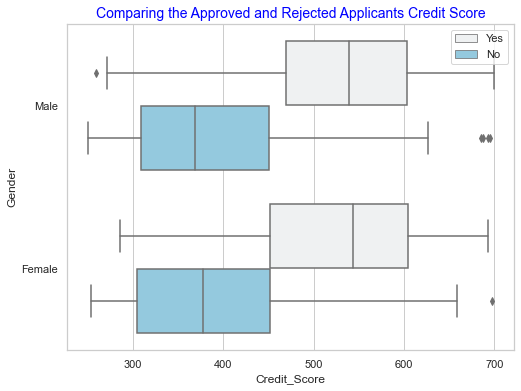

In [32]:
# The goal in this example is to compare the credit score distribution between:
# a. approved women vs. approved men.
# b. rejected women vs. rejected men.
displayer_boxPlot(df_all, 'Credit_Score', 'Gender', 'Credit_Decision')

***

##### <span style='color:red'> Code 6:  </span>


displayer_Probability_Density_Function helps an auditor to plot the probability density function (pdf) of any continuous variable (for example, credit score) and compare the distribution of the variable of interest between women and men applicants. 

In [33]:
def displayer_Probability_Density_Function(df_f, df_m, crd_score): 

    sns.set(rc = {"figure.figsize": (6, 6)})
    
    sns.distplot(df_f[str(crd_score)], bins = 10, hist = True, kde = True, color = 'blue', 
                 kde_kws = dict(linewidth = 3), label = 'Women', norm_hist = True)
    
    sns.distplot(df_m[str(crd_score)], bins = 10, hist = False, kde = True, color = 'red', 
                 kde_kws = dict(linewidth = 3), label = 'Men', norm_hist = True)

    plt.legend(prop = {'size': 12}, title = 'Gender')
    plt.title('Distribution of credit score between men and women applicants', color = 'blue', size = 20)
    plt.xlabel('Credit Score', size = 16)
    plt.ylabel('Density', size = 16)
    plt.xlim(100, 1200)

    plt.show()

##### <span style='color:orange'> Example 6:  </span>

C:\Users\mm\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mm\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


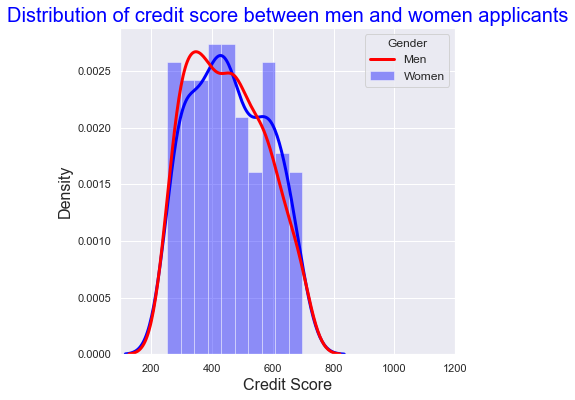

In [34]:
displayer_Probability_Density_Function(df_female, df_male, 'Credit_Score')

***

### <span style = 'color:purple'> Step 2. Inferential statistics and auditing gender bias  </span>

#### 2.1. Auditing for Group-level fairness of model / credit scores using balance tests

Positive and negative balance tests are among the most fundamental bias audit tests, and are used to 
estimate the significance of the difference between two numbers. A positive (or negative) balance test on model/credit scores, for example, aims to test whether the approved (or rejected) male and female credit applicants exhibit statistically significant differences in their scores. A positive balance test would apply to the applicants who are approved, while a negative balance test would apply to the applicants who are rejected. To run a positive balance test, the auditor compares the average model / credit score of approved men vs. approved women using a two sample t-test. The negative balance test uses the same construct among rejected applicants.

To compare the differences between men and women's average model scores, we can use two sample T-Test. 
For approved and rejected applicants, we conduct separate tests. Python scipy package has a method called 

ttest_ind(a, b, equal_var = True) where:
a: an array of sample observations for group 1
b: an array of sample observations for group 2
equal_var: if True, perform a standard independent 2 sample t-test that assumes equal population variances. 
If False, perform Welch’s t-test, which does not assume equal population variances. This is True by default.
Before we perform the test, we need to decide if we’ll assume the two populations have equal variances or not. 
As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample 
variance to the smaller sample variance is less than 4.  
Here, our code takes care of this part and calculates the variance ratio and based on that, automatically decides
which test is the right one to apply. 

The following tables show the way that we suggest to structure your test and tests results. 
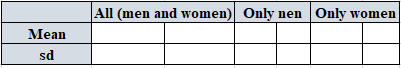
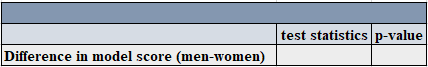


##### <span style='color:red'> Code 7:  </span>


positive_balance_test is a function that helps an auditor assess the positive balance fairness notion test.

To learn more about this fairness notion, please read 'CHECK YOUR BIAS: A FIELD GUIDE FOR LENDERS' report. 

This function takes six arguments. 
* argument 1: a dataframe object containing both female and male customers (whole portfolio)
* argument 2: a dataframe object containing records of all the women in the portfolio
* argument 3: a dataframe object containing records of all the men in the portfolio 
* argument 4: name of the variable that shows the outcome of a credit decision. This argument takes a binary value!
* argument 5: label that argument 4 takes for the approved credit cases. 
* argument 6: name of the variable that shows the credit score/model score

In [37]:
def positive_balance_test(df_all, df_female, df_male, Decision_Result_Variable, Approved_Label, Crd_Score):
    
    df_all_approved = df_all.loc[df_all[str(Decision_Result_Variable)] == str(Approved_Label)]  # a dataframe for all approved applicants
    df_female_approved = df_female.loc[df_female[str(Decision_Result_Variable)] == str(Approved_Label)]  # a dataframe for approved female
    df_male_approved = df_male.loc[df_male[str(Decision_Result_Variable)] == str(Approved_Label)]        # a dataframe for approved male

    f_cred_score = df_female_approved[str(Crd_Score)]
    m_cred_score = df_male_approved[str(Crd_Score)]

    variance_ratio = max(np.var(m_cred_score), np.var(f_cred_score)) / min(np.var(m_cred_score), np.var(f_cred_score))
    equality = True
    if variance_ratio > 4:
        equality = False
    p_value = ttest_ind(f_cred_score, m_cred_score, equal_var = equality).pvalue
    test_statistics = ttest_ind(f_cred_score, m_cred_score, equal_var = equality).statistic

    sum_stat_approved = pd.DataFrame(
        {
        'All(men and women)': [np.round(df_all_approved[str(Crd_Score)].mean(), 4), np.round(df_all_approved[str(Crd_Score)].std(), 4)], 
        'Only men': [np.round(df_male_approved[str(Crd_Score)].mean(), 4), np.round(df_male_approved[str(Crd_Score)].std(), 4)], 
        'Only women': [np.round(df_female_approved[str(Crd_Score)].mean(), 4), np.round(df_female_approved[str(Crd_Score)].std(),4)]
        }
           , index = ['Mean', 'sd'])

    display(sum_stat_approved.style.set_caption("Credit/model score summary statistics (approved cases)").set_table_styles([{'selector': 'caption',
        'props': [('color', 'blue'), ('font-size', '13px')]}]))

    test_result_table = pd.DataFrame({'test statistic': test_statistics, 'p_value': p_value}, index = ['Difference (men - women)'])

    print('..........................................')
    display(test_result_table.style.set_caption("Positive fairness balance test").set_table_styles([{'selector': 'caption',
        'props': [('color', 'blue'),('font-size', '13px')]}]))

    print()

    if p_value <= 0.05:
        print(Fore.RED, '>>> Positive balance Fairness test on credit scores failed among applicants who have received a loan offer.', emoji.emojize(':thumbs_down:'))

    else: 
        print(Fore.BLUE, '>>> Positive balance Fairness test on credit scores did "Not" fail among applicants who have received a loan offer.', emoji.emojize(':thumbs_up:'))

##### <span style='color:orange'> Example 7:  </span>

In [38]:
positive_balance_test(df_all, df_female, df_male, 'Credit_Decision', 'Yes', 'Credit_Score')  

,All(men and women),Only men,Only women
Mean,531.264400,533.308400,528.000000
sd,96.256300,97.138000,95.468500


..........................................


,test statistic,p_value
Difference (men - women),-0.353092,0.724452



 >>> Positive balance Fairness test on credit scores did "Not" fail among applicants who have received a loan offer. 👍


***

##### <span style='color:red'> Code 8:  </span>


negative_balance_test is a function that helps an auditor assess the negative balance fairness notion test. 

To learn more about this fairness notion, please read 'CHECK YOUR BIAS: A FIELD GUIDE FOR LENDERS' report. 
This function takes six arguments. 

This function takes six arguments. 
* argument 1: a dataframe object containing both female and male customers (whole portfolio)
* argument 2: a dataframe object containing records of all the women in the portfolio
* argument 3: a dataframe object containing records of all the men in the portfolio 
* argument 4: name of the variable that shows the outcome of a credit decision. This argument takes a binary value!
* argument 5: label that argument 4 takes for the rejected credit cases. 
* argument 6: name of the variable that shows the credit score/model score

In [42]:
def negative_balance_test(df_all, df_female, df_male, Decision_Result_Variable, Rejected_Label, Crd_Score):
    
    df_all_rejected = df_all.loc[df_all[str(Decision_Result_Variable)] == str(Rejected_Label)]
    df_female_rejected = df_female.loc[df_female[str(Decision_Result_Variable)] == str(Rejected_Label)]  # a dataframe for rejected female
    df_male_rejected = df_male.loc[df_male[str(Decision_Result_Variable)] == str(Rejected_Label)]        # a dataframe for rejected male

    f_cred_score = df_female_rejected[str(Crd_Score)]
    m_cred_score = df_male_rejected[str(Crd_Score)]

    variance_ratio = max(np.var(m_cred_score), np.var(f_cred_score)) / min(np.var(m_cred_score), np.var(f_cred_score))
    equality = True
    if variance_ratio > 4:
        equality = False
    p_value = ttest_ind(f_cred_score, m_cred_score, equal_var = equality).pvalue
    test_statistics = ttest_ind(f_cred_score, m_cred_score, equal_var = equality).statistic

    sum_stat_approved = pd.DataFrame(
        {
            'All(men and women)': [np.round(df_all_rejected[str(Crd_Score)].mean(), 4), np.round(df_all_rejected[str(Crd_Score)].std(), 4)], 
            'Only men': [np.round(df_male_rejected[str(Crd_Score)].mean(), 4), np.round(df_male_rejected[str(Crd_Score)].std(), 4)], 
            'Only women': [np.round(df_female_rejected[str(Crd_Score)].mean(), 4), np.round(df_female_rejected[str(Crd_Score)].std(),4)]
        }
           , index = ['Mean', 'sd'])


    display(sum_stat_approved.style.set_caption("Credit/model score summary statistics (rejected cases)").set_table_styles([{'selector': 'caption',
        'props': [('color', 'blue'), ('font-size', '13px')]}]))

    test_result_table = pd.DataFrame({'test statistic': test_statistics, 'p_value': p_value}, index = ['Difference (men - women)'])

    print('..........................................')
    display(test_result_table.style.set_caption("Negative fairness balance test").set_table_styles([{'selector': 'caption',
        'props': [('color', 'blue'),('font-size', '13px')]}]))

    print()

    if p_value <= 0.05:
        print(Fore.RED, '>>> Negative balance Fairness test on credit scores failed among applicants who have not received a loan offer.', emoji.emojize(':thumbs_down:'))

    else: 
        print(Fore.BLUE, '>>> Negative balance Fairness test on credit scores did "Not" fail among applicants who have not received a loan offer.', emoji.emojize(':thumbs_up:'))

##### <span style='color:orange'> Example 8:  </span>

In [43]:
negative_balance_test(df_all, df_female, df_male, 'Credit_Decision', 'No', 'Credit_Score')

,All(men and women),Only men,Only women
Mean,392.615000,391.509800,394.931500
sd,107.461400,105.430600,112.307800


..........................................


,test statistic,p_value
Difference (men - women),0.223369,0.823452



 >>> Negative balance Fairness test on credit scores did "Not" fail among applicants who have not received a loan offer. 👍


************************************

#### 2.2. Auditing for Group- or Individual-level fairness using logistic regression
##### How to audit gender fairness of credit approval and non-performing loans (NPLs)

To understand if there is a strong relationship between the “gender” variable and some categorical credit terms, such as credit approval or non-performing loans (NPLs), an auditor can use classification techniques such as logistic regression. 

Logistic regression (also known as a logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log of odds ratio, or the natural logarithm of odds. 

Like other regression models, logistic regression allows for adding further control variables to take into account other relevant characteristics of the applicants (e.g., demographics, risk factors, requested loan characteristics, etc.), apart from gender, that may explain differential outcomes. The assessment is unconditional if it does not account for control variables (i.e., a test of group-level fairness), and conditional if it accounts for control variables (i.e., a test of individual-level fairness). 

Example: Auditing for gender bias in credit approval. In other words, we are trying to understand if there are any biases in the FSP's credit approval that gender can explain it.
To answer this question using logistic regression, we can rephrase the question and ask 'does gender predict the likelihood of credit approval' (to be more precise, the log of odds ratio of approval)? 

Logistic regression model structure:

DV: Credit/loan approval (DV = 1, if approved and DV = 0 if rejected)
EVs: 
    a. In an unconditional model: Gender  
    b. In a conditional model: Gender, new applicant or renewal, (income - expenses), demographics, has any credit bureau data (0/1), verification checks etc.

Comment:  Check concept note # II, to learn more about the EVs we have used and our suggested approach to set your models up.


##### <span style='color:red'> Code 9:  </span>

add_stepwise_logistic is a function that takes two arguments: 

* argument 1 (X): a dataframe containing all the predictors that the auditor wants to include in the model.

* argument 2 (y): a series containing the outcome variable of the model.

In [44]:
def add_stepwise_logistic(X, y):
   
    p_all = list(X.columns)
    p_used = []
    p_unused = [p for p in p_all if p not in p_used]
        
    
    r = []
    for p in p_unused:
        f = 'Credit_Score ~ {}'.format(' + '.join([p] + p_used))
              
        p_used.append(p)
        
        model = smf.glm(formula = f, data = pd.concat([X, y], axis = 1), family = sm.families.Binomial()).fit()
        results_as_html_1 = model.summary().tables[1]
        display(results_as_html_1)
        print('')
        print(colored('*******************************************************', 'blue'))

##### <span style='color:orange'> Example 9:  </span>

In [45]:
# In this example, we select a subset of variables and use them in our model. 

modeling_data = df_all[['Credit_Score', 'Gender', 'Age', 'Total_Income', 'Disbursed_Credit_Amount', 
                        'Verification_Any', 'Marital_Status']]

qual = ['Verification_Any', 'Marital_Status', 'Gender']
modeling_data = pd.get_dummies(modeling_data, columns = qual, drop_first = True)

X = modeling_data.drop(['Credit_Score'], axis = 1)
first_column = X.pop('Gender_Male')
X.insert(0, 'Gender_Male', first_column)

y = modeling_data['Credit_Score']

add_stepwise_logistic(X, y)

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.092e+18,5.67e+06,5.45e+11,0.000,3.09e+18,3.09e+18
Gender_Male,-5.91e+16,7.03e+06,-8.4e+09,0.000,-5.91e+16,-5.91e+16



*******************************************************


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.228e+18,1.12e+07,2.88e+11,0.000,3.23e+18,3.23e+18
Age,-3.402e+15,2.43e+05,-1.4e+10,0.000,-3.4e+15,-3.4e+15
Gender_Male,-5.238e+16,7.05e+06,-7.43e+09,0.000,-5.24e+16,-5.24e+16



*******************************************************


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.319e+18,1.33e+07,2.49e+11,0.000,3.32e+18,3.32e+18
Total_Income,-1.29e+13,1015.976,-1.27e+10,0.000,-1.29e+13,-1.29e+13
Gender_Male,-5.336e+16,7.05e+06,-7.57e+09,0.000,-5.34e+16,-5.34e+16
Age,-3.724e+15,2.44e+05,-1.52e+10,0.000,-3.72e+15,-3.72e+15



*******************************************************


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.143e+18,2.44e+07,8.79e+10,0.000,2.14e+18,2.14e+18
Disbursed_Credit_Amount,2.625e+14,2338.974,1.12e+11,0.000,2.62e+14,2.62e+14
Gender_Male,6.241e+15,1.05e+07,5.95e+08,0.000,6.24e+15,6.24e+15
Age,2.081e+15,3.64e+05,5.72e+09,0.000,2.08e+15,2.08e+15
Total_Income,6.234e+12,1479.536,4.21e+09,0.000,6.23e+12,6.23e+12



*******************************************************


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.152e+18,2.45e+07,8.77e+10,0.000,2.15e+18,2.15e+18
Verification_Any_Yes,-4.559e+16,1.46e+07,-3.13e+09,0.000,-4.56e+16,-4.56e+16
Gender_Male,8.213e+15,1.05e+07,7.81e+08,0.000,8.21e+15,8.21e+15
Age,1.997e+15,3.65e+05,5.47e+09,0.000,2e+15,2e+15
Total_Income,6.225e+12,1479.539,4.21e+09,0.000,6.23e+12,6.23e+12
Disbursed_Credit_Amount,2.624e+14,2338.988,1.12e+11,0.000,2.62e+14,2.62e+14



*******************************************************


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.136e+18,2.47e+07,8.66e+10,0.000,2.14e+18,2.14e+18
Marital_Status_Others,9.768e+16,1.62e+07,6.04e+09,0.000,9.77e+16,9.77e+16
Gender_Male,-7.389e+14,1.06e+07,-6.96e+07,0.000,-7.39e+14,-7.39e+14
Age,2.14e+15,3.66e+05,5.85e+09,0.000,2.14e+15,2.14e+15
Total_Income,6.337e+12,1479.655,4.28e+09,0.000,6.34e+12,6.34e+12
Disbursed_Credit_Amount,2.633e+14,2343.068,1.12e+11,0.000,2.63e+14,2.63e+14
Verification_Any_Yes,-4.965e+16,1.46e+07,-3.4e+09,0.000,-4.96e+16,-4.96e+16



*******************************************************


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,2.119e+18,2.5e+07,8.47e+10,0.000,2.12e+18,2.12e+18
Marital_Status_Single,5.13e+16,1.19e+07,4.31e+09,0.000,5.13e+16,5.13e+16
Gender_Male,4.6e+15,1.07e+07,4.3e+08,0.000,4.6e+15,4.6e+15
Age,2.175e+15,3.66e+05,5.95e+09,0.000,2.17e+15,2.17e+15
Total_Income,6.307e+12,1479.672,4.26e+09,0.000,6.31e+12,6.31e+12
Disbursed_Credit_Amount,2.629e+14,2344.938,1.12e+11,0.000,2.63e+14,2.63e+14
Verification_Any_Yes,-5.164e+16,1.46e+07,-3.54e+09,0.000,-5.16e+16,-5.16e+16
Marital_Status_Others,1.12e+17,1.65e+07,6.78e+09,0.000,1.12e+17,1.12e+17



*******************************************************


***

#### 2.3. Auditing for Group- or Individual-level fairness using linear regression.
##### How to audit gender fairness of credit scores, credit amount, interest rate, collateral amount, and other credit terms. 

Introduction:
Linear regression techniques look for patterns, or “linear” relationships, between explanatory variables (EV) and dependent variables (DV). There are many kinds of linear regression techniques. One type of regression is called least squares. To understand if there is a strong relationship between the “female” variable and a specific credit term (e.g., credit amount, interest rate, collateral amount etc.), relative to male applicants, an auditor can use least squares regression and regress the desired credit outcome on gender. To make the connection between using regression and detecting bias, let us have a quick recall on our definition of gender bias in a credit process. 'Gender-based credit bias happens when a credit process creates results that are systemically prejudiced against certain people, for reasons related to  gender'. In other words, in a fair scenario, gender must not contribute to any predictions on any loan terms. Now, it should be clearer how we are going to use regression for auditing bias. If you can regress a credit term on gender and observe statistically and economically significant relationships, this is indicative of an unconditional gender bias in the portfolio (i.e., a test of "group-level fairness"). Furthermore, we then recommend setting up increasingly conditional analyses that take into account other relevant characteristics of the applicants (e.g., demographics, risk factors, requested loan characteristics, etc.), apart from gender, that may explain differential outcomes. For purposes of bias auditing, this moves closer towards measuring whether a lender is achieving “individual-level fairness”.

Example: 
Auditing for gender bias in loan amount. In other words, we are trying to understand if there are any biases in the FSP's credit approval amount that gender can explain.
To answer this question using regression, let us rephrase the question and ask 'does gender predict the approved loan amount?'
Using regression to answer 'does gender predict the approved loan amount?'

Therefore, one could raise the following questions about other loan terms and use regression to audit gender bias in each term. 
* Does gender predict the difference between requested and offered loan amount?
* Does gender predict loan amount disbursed?
* Does gender predict interest rate?
* Does gender predict length of loan maturity?
* Does gender predict guarantee/collateral amount?
* Does gender predict credit insurance amount?

Regression model structure:

DV: Credit/loan amount

EVs:
a. In an unconditional model:
   Gender - A binary variable that takes 1, if gender is female and 0 otherwise.
b. In a conditional model:
   Gender, new applicant or renewal, (income - expenses), demographics, has any credit bureau data (0/1), verification checks and etc.

A comment on using EVs:
Although the list of EVs may vary between different FSP, there are a couple of EVs that we recommend to add to your model.  Specifically, if you are working in a developing economy. 

New applicant or renewal: Some FSPs may assess new applicants and old applicant's creditworthiness using different processes and techniques. Most likely that would be the case, since an FSP would have more data on its old customers compared to the new applicants. Therefore, when auditing bias, it is important not to consider the portfolio as a single homogenous group. To address this point, you can split the portfolio into different segments and assess fairness in each segment separately or you can add a categorical variable to represent each segment of your model. The latter is the approach we have taken in our modeling approach.
 
Demographics: Age, economic characteristics, and household size are examples of such variables. 

Has any credit bureau data: due to a variety of reasons, it is common to see a low-income customer with no record and historical data in credit bureaus. Lack of required information or information asymmetry can create biases and algorithms or loan officers may treat such customers differently. Therefore, in your bias audit practice, it is helpful to create and use a binary control variable that shows whether someone has credit bureau information.

Verification checks: Many FSPs ask for their loan officers' input when assessing an applicant's creditworthiness. However, to keep the costs down and be more efficient, they may put an extra verification mandate (home visit, business visit, interview ...) on customers that the FSP is uncertain about their repayment capacity. We recommend adding a binary control variable into your model to flag those customers who have received visits. Working with an FSP partner, we saw that women applicants are more likely to receive more home visits and the chance that a women applicant gets rejected after a home visit was higher compared to a man applicant with the same financial credentials! Therefore, we recommend adding such a control variable to your model to let you detect such scenarios.  

If necessary, you can check the interaction effect between gender and control variables.  

The following table shows the way that we have set our regression model to answer to 'Does gender predict the loan amount requested?' question.  
Note: The unit of observation is at the individual application level.

Guide on how to read the table:

b: estimated regression coefficient
se: standard error of b
(number): numbers in parentheses show the output of a model. '(1)' shows the model containing only one variable, gender - unconditional model. Models '(2)' - model '(8)', show the conditional models. In model '(2)', we have added the application month as the only control variable, in model (3), we have added both application month and New applicant or renewal variables. Taking the same logic, model '(8)', contains all the seven control variables.



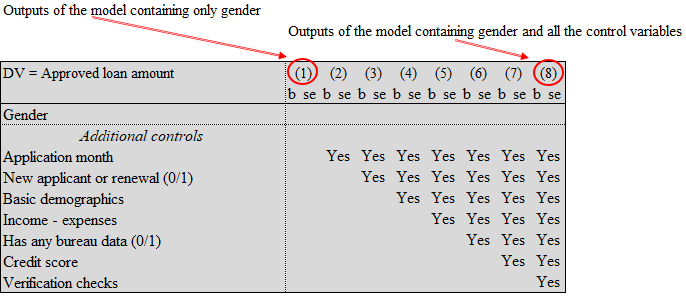

##### <span style='color:red'> Code 10:  </span>

In this section, we introduce a function named add_stepwise(X, y), which takes two arguments.

* argument 1 (X): a dataframe containing all the predictors that auditor wants to include in the model.

* argument 2 (y): a series containing the outcome variable of model.


To better interprete the model outputs, we recommend keeping the gender variable as your first variable in X. In example 10,
we have shown how an auditor can do this. 

In [46]:
def add_stepwise(X, y):
   
    p_all = list(X.columns)
    p_used = []
    p_unused = [p for p in p_all if p not in p_used]
           
    r = []
    for p in p_unused:
        f = 'Credit_Score ~ {}'.format(' + '.join([p] + p_used))
        
        p_used.append(p)
        
        model = smf.ols(formula = f, data = pd.concat([X, y], axis = 1)).fit()
        results_as_html_1 = model.summary().tables[1]
        display(results_as_html_1)
        print('')
        print(colored('*******************************************************', 'blue'))      

##### <span style='color:orange'> Example 10:  </span>

In [103]:
# In this example, we select a subset of variables and use them in our model. 

modeling_data = df_all[['Credit_Score', 'Gender', 'Age', 'Total_Income',  # selecting a subset of variables    
                        'Disbursed_Credit_Amount', 'Verification_Any', 'Marital_Status']]

qual = ['Verification_Any', 'Marital_Status', 'Gender']

modeling_data = pd.get_dummies(modeling_data, columns = qual, drop_first = True)

X = modeling_data.drop(['Credit_Score'], axis = 1)
first_column = X.pop('Gender_Male')
X.insert(0, 'Gender_Male', first_column)

y = modeling_data['Credit_Score']

add_stepwise(X, y)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,458.6143,10.449,43.889,0.000,438.071,479.157
Gender_Male,-8.7489,12.961,-0.675,0.500,-34.229,16.732



*******************************************************


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,478.6511,20.657,23.171,0.000,438.040,519.263
Age,-0.5035,0.448,-1.124,0.262,-1.384,0.377
Gender_Male,-7.7537,12.987,-0.597,0.551,-33.285,17.778



*******************************************************


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,492.1929,24.552,20.047,0.000,443.924,540.462
Total_Income,-0.0019,0.002,-1.020,0.308,-0.006,0.002
Gender_Male,-7.8984,12.987,-0.608,0.543,-33.430,17.634
Age,-0.5512,0.450,-1.224,0.222,-1.436,0.334



*******************************************************


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,318.0671,16.258,19.564,0.000,285.972,350.162
Disbursed_Credit_Amount,0.0389,0.002,24.900,0.000,0.036,0.042
Gender_Male,0.9238,7.002,0.132,0.895,-12.898,14.746
Age,0.3080,0.243,1.269,0.206,-0.171,0.787
Total_Income,0.0009,0.001,0.935,0.351,-0.001,0.003



*******************************************************


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,319.3917,16.395,19.481,0.000,287.025,351.758
Verification_Any_Yes,-6.7484,9.732,-0.693,0.489,-25.961,12.464
Gender_Male,1.2157,7.025,0.173,0.863,-12.653,15.084
Age,0.2956,0.244,1.212,0.227,-0.186,0.777
Total_Income,0.0009,0.001,0.932,0.353,-0.001,0.003
Disbursed_Credit_Amount,0.0388,0.002,24.859,0.000,0.036,0.042



*******************************************************


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,317.0436,16.450,19.274,0.000,284.568,349.520
Marital_Status_Others,14.4591,10.787,1.340,0.182,-6.837,35.755
Gender_Male,-0.1094,7.078,-0.015,0.988,-14.083,13.864
Age,0.3168,0.244,1.300,0.195,-0.164,0.798
Total_Income,0.0009,0.001,0.951,0.343,-0.001,0.003
Disbursed_Credit_Amount,0.0390,0.002,24.954,0.000,0.036,0.042
Verification_Any_Yes,-7.3492,9.719,-0.756,0.451,-26.538,11.839



*******************************************************


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,314.4672,16.673,18.861,0.000,281.549,347.386
Marital_Status_Single,7.5945,7.944,0.956,0.340,-8.090,23.279
Gender_Male,0.6809,7.128,0.096,0.924,-13.392,14.754
Age,0.3220,0.244,1.320,0.189,-0.160,0.803
Total_Income,0.0009,0.001,0.946,0.345,-0.001,0.003
Disbursed_Credit_Amount,0.0389,0.002,24.889,0.000,0.036,0.042
Verification_Any_Yes,-7.6443,9.727,-0.786,0.433,-26.848,11.560
Marital_Status_Others,16.5721,11.014,1.505,0.134,-5.173,38.317



*******************************************************


************************************

#### 2.4. Auditing for individual-level fairness using regression discontinuity:
##### Using a quasi-experimental approach to audit gender fairness

Regression discontinuity design (RDD) is a quasi experimental design that is typically used to determine the causal effects of interventions by comparing outcomes for observations where there are (arbitrary) cutoffs or thresholds above or below which an intervention is assigned. 

The intuition is that observations lying closely on either side of the thresholds are likely to have much more similar characteristics, which increases the validity of the comparison. In our case, we co-opt the method for purposes of bias assessment by testing whether women and men applicants appear to show different discontinuities (e.g., in terms of approval rates or loan terms) around key credit score or risk thresholds of the lender. Many lenders use some form of credit score-- whether external or in-house--to segment borrowers into different risk categories, which have bearing on loan approval and/or loan terms to be provided. For some lenders, we find that these can often be “fuzzy” thresholds (e.g., they provide minimum requirements but do not always equate with automated loan approval) and/or that approval or provided loan terms take into consideration additional human decisions (e.g., in the case of hybrid credit assessment approaches). In such cases, RDD can provide an intuitive method for assessing bias across a range of outcomes. Broadly speaking, the approach can be separated into two steps. First, the auditor should identify any cutoff or risk thresholds that are used by the lender for decisions on approval or loan terms. For example, credit scores may be categorized into high, medium, or low risk. This categorization is a subjective exercise that is dependent on the actual process of a given lender (there is a sample piece of code in the appendix section that shows how you yourself can create risk categories). The second step is to audit for gender bias in each category. The bias audit can leverage a range of statistical methods, but we generally suggest using least squares regression for any continuous dependent variables and logit regression for any binary dependent variables. The goal is to assess whether men and women applicants who are close to the cutoff points—and who would be assumed to be fairly similar to one another—have a different likelihood of approval or other loan terms such as loan amount, interest rate, or loan tenure.

The table below provides a template for how an auditor could use RDD to assess the presence of gender bias by comparing approval rates for men and women who are right above and below a hypothetical minimum approval threshold. In the example, the RDD model is re-run using varying windows around the minimum approval threshold (e.g., +/- 15, 30, 45, and 60 points) to test for robustness of the results. Working with our FSP partners, we used +/- 15, 30, 45, and 60 points as bandwidths. That being said, an auditor may need to pick other bandwidths for the audit process. The RDD can also be run conditionally, through the addition of other relevant controls. 

Based on the model output (reflected in the table below), the auditor can compare women to men; differences in the regression coefficient (indicating differences in magnitude between windows); and how these change with the presence or absence of further control variables.


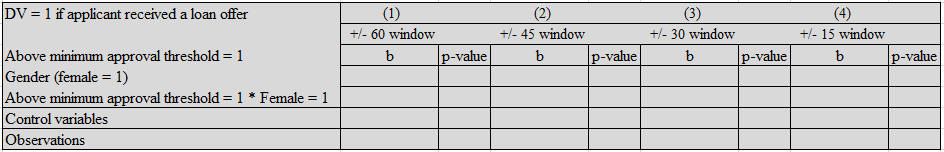

***

##### <span style='color:red'> Code 11:  </span>


RDD_preliminary is a function that takes four arguments: 
* argument 1. a dataframe object (ideally containing all the applicants)  
* argument 2. name of the variable used for credit score/credit model 
* argument 3. the threshold in which a new risk category starts and another category ends.
* argument 4. the width of the window that an auditor uses in the RDD design  

We used the suffix 'preliminary' for this function, because other RDD functions that perform the bias detection are going to use the 'RDD_preliminary' function. 

In [104]:
def RDD_preliminary(df, score, start, window):     
    
    while True:                                                                        # validate the value of 'start' argument
        start = int(start)
        if start > 0 :
            break
        else :
            print('enter a valid value!')
            break
    
    while True:                                                                         # validate the value of 'window' argument
        window = int(window)
        if window > 0 and window < (df[str(score)].max() - df[str(score)].min()):  
            break
        else:
            print('enter a valid value!')
            break
                    
    df_new = df.loc[(df[str(score)] < start + window) & (df[str(score)] > start - window)] # create a new dataframe 
    
    def above_below_constructor(dt):                                                       # create a dummy variable to show
        if (dt[str(score)] > start):                                                       # whether an applicant is above or
            val = 'Yes'                                                                    # below the RDD threshold ('start')  
        else:
            val = 'No'       
        return val

    df_new['Above_threshold'] = df_new.apply(above_below_constructor, axis = 1) 

    return df_new

##### <span style='color:orange'> Example 11:  </span>

In [281]:
RDD_df = RDD_preliminary(df_all, 'Credit_Score' , 400, 100)  # create an RDD dataset

***

##### <span style='color:red'> Code 12:  </span>


add_stepwise_logistic_RDD is a function that lets the auditor assess the presence of bias on the thresholds of different risk categories. This function can perform both conditional and unconditional assessment. However, it does not assess the interaction effect of different variables (*). An auditor can use this function for bias detection when the outcome variable is categorical.

add_stepwise_logistic_RDD takes three arguments: 

* argument 1 (X): a dataframe object containing all the predictors that the auditor wants to include in the model.

* argument 2 (y): a series containing the outcome variable of the model.

* argument 3: name of the variable (loan term) that the auditor wants to assess its fairness

*To assess the interaction effect use the 'add_stepwise_logistic_RDD_Interaction' function. 

In [284]:
def add_stepwise_logistic_RDD(X, y, var_input):  
   
    p_all = list(X.columns)
    p_used = []
    p_unused = [p for p in p_all if p not in p_used]
          
    r = []
    for p in p_unused:
        f = '{Var_of_interest} ~ {var_combination}'.format(Var_of_interest = str(var_input), var_combination = ' + '.join([p] + p_used))        
        p_used.append(p)
        
        model = smf.glm(formula = f, data = pd.concat([X, y], axis = 1), family = sm.families.Binomial()).fit()
        results_as_html_1 = model.summary().tables[1]
        display(results_as_html_1)
        print('')
        print(colored('*******************************************************', 'blue'))

##### <span style='color:orange'> Example 12:  </span>

In [286]:
RDD_subset_data = RDD_df[['Credit_Score', 'Gender', 'Credit_Decision', 'Above_threshold']]

qual = ['Credit_Decision',  'Gender', 'Above_threshold']

RDD_subset_data = pd.get_dummies(RDD_subset_data, columns = qual, drop_first = True)

X = RDD_subset_data.drop(['Credit_Decision_Yes'], axis = 1)
first_column = X.pop('Gender_Male')
X.insert(0, 'Gender_Male', first_column)

y = RDD_subset_data['Credit_Decision_Yes']

add_stepwise_logistic_RDD(X, y, 'Credit_Decision_Yes')

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.4884,0.244,-1.998,0.046,-0.968,-0.009
Gender_Male,-0.3754,0.305,-1.232,0.218,-0.973,0.222



*******************************************************


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-10.5374,1.542,-6.833,0.000,-13.560,-7.515
Credit_Score,0.0246,0.004,6.775,0.000,0.017,0.032
Gender_Male,-0.5480,0.364,-1.506,0.132,-1.261,0.165



*******************************************************


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-6.4421,2.248,-2.865,0.004,-10.849,-2.035
Above_threshold_Yes,1.6940,0.728,2.325,0.020,0.266,3.122
Gender_Male,-0.4751,0.373,-1.273,0.203,-1.207,0.256
Credit_Score,0.0120,0.006,1.905,0.057,-0.000,0.024



*******************************************************


***

##### <span style='color:red'> Code 13:  </span>

add_stepwise_logistic_RDD_Interaction is a function that lets an auditor assess the presence of bias on the thresholds of different risk categories. It helps the auditor to assess the interaction effect between 'gender' and 'above/below the threshold' variables when the outcome variable is a binary variable. 

add_stepwise_logistic_RDD_Interaction takes two arguments:
* argument 1 (X): a dataframe containing all the predictors that the auditor wants to include in the model.

* argument 2 (y): a series containing the outcome variable of the model.

* argument 3: name of the variable (loan term) that the auditor wants to assess its fairness 

In [287]:
def add_stepwise_logistic_RDD_Interaction(X, y, var_input):
   
    p_all = list(X.columns)
    p_used = []
    p_unused = [p for p in p_all if p not in p_used]
            
    r = []
    for p in p_unused:
        f = '{Var_of_interest} ~ {var_combination}'.format(Var_of_interest = str(var_input), var_combination = ' + '.join([p] + p_used)) 
              
        p_used.append(p)
        
        model = smf.glm(formula = f, data = pd.concat([X, y], axis = 1), family = sm.families.Binomial()).fit()
        results_as_html_1 = model.summary().tables[1]
        display(results_as_html_1)
        print('')
        print(colored('*******************************************************', 'blue'))

##### <span style='color:orange'> Example 13:  </span>

In [288]:
RDD_subset_data = RDD_df[['Gender', 'Above_threshold', 'Credit_Decision']]

qual = ['Gender', 'Above_threshold', 'Credit_Decision']

RDD_subset_data = pd.get_dummies(RDD_subset_data, columns = qual, drop_first = True)

X = RDD_subset_data.drop(['Credit_Decision_Yes'], axis = 1)
first_column = X.pop('Gender_Male')
X.insert(0, 'Gender_Male', first_column)

y = RDD_subset_data['Credit_Decision_Yes']

add_stepwise_logistic_RDD_Interaction(X, y, 'Credit_Decision_Yes')

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.4884,0.244,-1.998,0.046,-0.968,-0.009
Gender_Male,-0.3754,0.305,-1.232,0.218,-0.973,0.222



*******************************************************


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-2.2917,0.432,-5.307,0.000,-3.138,-1.445
Above_threshold_Yes,2.8903,0.418,6.916,0.000,2.071,3.709
Gender_Male,-0.3880,0.367,-1.056,0.291,-1.108,0.332



*******************************************************


***

##### <span style='color:red'> Code 14:  </span>

add_stepwise_RDD_Interaction is a function that lets an auditor assess the presence of bias on the thresholds of different risk categories. This function can perform both conditional and unconditional assessment. However, it does not assess the interaction effect of different variables(*). An auditor can use this function for bias detection when the outcome variable is continuous.

add_stepwise_RDD_Interaction takes two arguments:
* argument 1 (X): a dataframe containing all the predictors that auditor wants to include in the model.

* argument 2 (y): a series containing the outcome variable of model.

* argument 3: name of the variable (loan term) that the auditor wants to assess its fairness 


*To assess the interaction effect use the 'add_stepwise_RDD_Interaction' function.

In [289]:
def add_stepwise_RDD(X, y, var_input):
   
    p_all = list(X.columns)
    p_used = []
    p_unused = [p for p in p_all if p not in p_used]
        
    
    r = []
    for p in p_unused:
        f = '{Var_of_interest} ~ {var_combination}'.format(Var_of_interest = str(var_input), var_combination = ' + '.join([p] + p_used))
        
        p_used.append(p)
        
        model = smf.ols(formula = f, data = pd.concat([X, y], axis = 1)).fit()
        results_as_html_1 = model.summary().tables[1]
        display(results_as_html_1)
        print('')
        print(colored('*******************************************************', 'blue'))
        print('')    

##### <span style='color:orange'> Example 14:  </span>

In [290]:
RDD_subset_data = RDD_df[['Credit_Score', 'Gender', 'Age', 'Total_Income', 'Disbursed_Credit_Amount', 
                        'Verification_Any', 'Marital_Status', 'Above_threshold']]

qual = ['Verification_Any', 'Marital_Status', 'Gender', 'Above_threshold']

RDD_subset_data = pd.get_dummies(RDD_subset_data, columns = qual, drop_first = True)

X = RDD_subset_data.drop(['Disbursed_Credit_Amount'], axis = 1)
first_column = X.pop('Gender_Male')
X.insert(0, 'Gender_Male', first_column)

y = RDD_subset_data['Disbursed_Credit_Amount']

add_stepwise_RDD(X, y, 'Disbursed_Credit_Amount')

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2680.0370,137.215,19.532,0.000,2406.228,2953.846
Gender_Male,92.2653,175.072,0.527,0.600,-257.086,441.617



*******************************************************



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2524.9957,567.430,-4.450,0.000,-3657.590,-1392.401
Credit_Score,11.8796,1.278,9.294,0.000,9.328,14.431
Gender_Male,-37.7556,117.405,-0.322,0.749,-272.098,196.586



*******************************************************



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2528.4138,564.151,-4.482,0.000,-3654.777,-1402.051
Age,-5.3257,3.989,-1.335,0.186,-13.290,2.639
Gender_Male,-24.7445,117.132,-0.211,0.833,-258.606,209.117
Credit_Score,12.3610,1.321,9.358,0.000,9.724,14.998



*******************************************************



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2501.0465,572.438,-4.369,0.000,-3644.283,-1357.810
Total_Income,-0.0058,0.015,-0.378,0.706,-0.036,0.025
Gender_Male,-23.5954,117.939,-0.200,0.842,-259.135,211.945
Credit_Score,12.3927,1.332,9.302,0.000,9.732,15.053
Age,-5.4169,4.022,-1.347,0.183,-13.450,2.616



*******************************************************



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2494.7746,576.949,-4.324,0.000,-3647.363,-1342.186
Verification_Any_Yes,-46.8136,164.537,-0.285,0.777,-375.514,281.886
Gender_Male,-20.8964,119.160,-0.175,0.861,-258.945,217.152
Credit_Score,12.4013,1.342,9.240,0.000,9.720,15.082
Age,-5.5173,4.066,-1.357,0.180,-13.641,2.606
Total_Income,-0.0059,0.015,-0.385,0.702,-0.037,0.025



*******************************************************



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2466.4268,578.190,-4.266,0.000,-3621.848,-1311.005
Marital_Status_Others,-183.7516,194.037,-0.947,0.347,-571.504,204.001
Gender_Male,-10.7567,119.736,-0.090,0.929,-250.029,228.516
Credit_Score,12.4049,1.343,9.236,0.000,9.721,15.089
Age,-5.8690,4.087,-1.436,0.156,-14.035,2.298
Total_Income,-0.0059,0.015,-0.384,0.702,-0.037,0.025
Verification_Any_Yes,-70.3636,166.537,-0.423,0.674,-403.161,262.434



*******************************************************



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2459.4284,583.187,-4.217,0.000,-3625.203,-1293.654
Marital_Status_Single,36.4682,143.906,0.253,0.801,-251.196,324.132
Gender_Male,-7.2613,121.421,-0.060,0.953,-249.978,235.456
Credit_Score,12.3504,1.370,9.013,0.000,9.611,15.090
Age,-5.7625,4.139,-1.392,0.169,-14.036,2.511
Total_Income,-0.0055,0.016,-0.356,0.723,-0.037,0.026
Verification_Any_Yes,-80.2350,172.250,-0.466,0.643,-424.558,264.088
Marital_Status_Others,-175.6471,198.093,-0.887,0.379,-571.630,220.336



*******************************************************



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,629.3613,504.174,1.248,0.217,-378.797,1637.520
Above_threshold_Yes,1899.5952,204.737,9.278,0.000,1490.197,2308.993
Gender_Male,99.5938,79.669,1.250,0.216,-59.715,258.902
Credit_Score,1.2019,1.495,0.804,0.425,-1.788,4.192
Age,-2.3789,2.712,-0.877,0.384,-7.801,3.044
Total_Income,-0.0034,0.010,-0.341,0.734,-0.024,0.017
Verification_Any_Yes,-62.0168,111.850,-0.554,0.581,-285.676,161.642
Marital_Status_Others,-172.4836,128.612,-1.341,0.185,-429.660,84.693
Marital_Status_Single,-99.8936,94.580,-1.056,0.295,-289.018,89.230



*******************************************************



***

##### <span style='color:red'> Code 15:  </span>


add_stepwise_RDD_Interaction is a function that lets an auditor assess the presence of bias on the thresholds of different risk categories. This function can perform both conditional and unconditional assessment. 
It helps the auditor to assess the interaction effect between 'gender' and 'above/below the threshold' variables when the outcome variable is continious. 

add_stepwise_RDD_Interaction takes two arguments:
* argument 1 (X): a dataframe containing all the predictors that auditor wants to include in the model.

* argument 2 (y): a series containing the outcome variable of model.

* argument 3: name of the variable (loan term) that the auditor wants to assess its fairness

In [291]:
def add_stepwise_RDD_Interaction(X, y, var_input):
   
    p_all = list(X.columns)
    p_used = []
    p_unused = [p for p in p_all if p not in p_used]
            
    r = []
    for p in p_unused:
        f = '{Var_of_interest} ~ {var_combination}'.format(Var_of_interest = str(var_input), var_combination = ' + '.join([p] + p_used))

        
        p_used.append(p)
        
        model = smf.ols(formula = f, data = pd.concat([X, y], axis = 1)).fit()
        results_as_html_1 = model.summary().tables[1]
        display(results_as_html_1)
        print('')
        print(colored('*******************************************************', 'blue'))
        print('')    

##### <span style='color:orange'> Example 15:  </span>

In [292]:
RDD_subset_data = RDD_df[['Credit_Score', 'Gender', 'Above_threshold', 'Disbursed_Credit_Amount']]

qual = ['Gender', 'Above_threshold']

RDD_subset_data = pd.get_dummies(RDD_subset_data, columns = qual, drop_first = True)

X = RDD_subset_data.drop(['Disbursed_Credit_Amount'], axis = 1)
first_column = X.pop('Gender_Male')
X.insert(0, 'Gender_Male', first_column)

y = RDD_subset_data['Disbursed_Credit_Amount']

add_stepwise_RDD_Interaction(X, y, 'Disbursed_Credit_Amount')

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2680.0370,137.215,19.532,0.000,2406.228,2953.846
Gender_Male,92.2653,175.072,0.527,0.600,-257.086,441.617



*******************************************************



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-2524.9957,567.430,-4.450,0.000,-3657.590,-1392.401
Credit_Score,11.8796,1.278,9.294,0.000,9.328,14.431
Gender_Male,-37.7556,117.405,-0.322,0.749,-272.098,196.586



*******************************************************



,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,590.8500,492.481,1.200,0.235,-392.420,1574.120
Above_threshold_Yes,1890.0654,197.306,9.579,0.000,1496.130,2284.000
Gender_Male,91.8131,77.697,1.182,0.242,-63.314,246.940
Credit_Score,0.9338,1.414,0.660,0.511,-1.889,3.757



*******************************************************



***

***

### The End!

**********************************

###### References:
1. Corbett-Davies, S., & Goel, S. (2018). The measure and mismeasure of fairness: A critical review of fair machine learning. arXiv preprint arXiv:1808.00023.
2. Verma, S., & Rubin, J. (2018, May). Fairness definitions explained. In 2018 ieee/acm international workshop on software fairness (fairware) (pp. 1-7). IEEE.